Text(0, 0.5, 'Frequency Index')

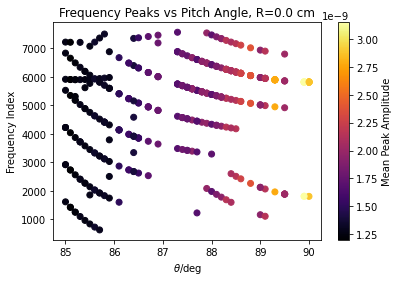

In [262]:
## imports ##
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle as pkl
import scipy.stats
####

## global ##
dataPath='/Users/ziegler/repos/mayfly/output/timeSeries1252021.pkl'
templatePitchAngles=np.linspace(85,90,51)
templatePos=np.linspace(0,5e-2,21)
radius=0.00
nPeaks=5
keysAmp=[]
keysInd=[]
keysR=[]
keysI=[]
for i in range(nPeaks):
    keysAmp.append('pAmp'+str(i))
    keysInd.append('pInd'+str(i))
    keysR.append('pR'+str(i))
    keysI.append('pI'+str(i))

colors=['r','b','g','c','m','k']
frequencyConversion=200e6/8192
####

## definitions ##

####

with open(dataPath,'rb') as infile:
    data=pkl.load(infile)

    
data=pd.DataFrame(data)

#rads=np.arange(0.00,0.05,0.01)
rads=[0.0]
#print(rads)
fig,axs=plt.subplots()
fig.set_facecolor('white')

for i,rad in enumerate(rads):

    dataR=data[data["r"]==rad].sort_values('pa')
    nPeaks=len(dataR['ind'].iloc[0])
    nEntries=dataR['pa'].size
    
    meanPow=np.zeros(nEntries)
    for n in range(nEntries):
        meanPow[n]=np.mean(dataR['amp'].iloc[n])
    
    for n in range(nPeaks):
        tempInds=[]
        tempAmps=[]
        for j in range(nEntries):
            tempInds.append((dataR['ind'].iloc[j])[n])
            tempAmps.append((dataR['amp'].iloc[j])[n])
        plot=axs.scatter(dataR['pa'],tempInds,c=meanPow,cmap='inferno')
    fig.colorbar(plot,label='Mean Peak Amplitude')
    
plt.title("Frequency Peaks vs Pitch Angle, R=0.0 cm")
plt.xlabel(r'$\theta$/deg')
plt.ylabel('Frequency Index')
#plt.savefig('/Users/ziegler/repos/romulus/output/frequencyPeaksVsPitchAngleR0.04.png')
    
    
    #print(meanPow)
   
    #for j in range(nEntries):
    #    axs[i].scatter(dataR['pa'].iloc[j]*np.ones(len(dataR['ind'].iloc[j])),
    #                   dataR['ind'].iloc[j],c=meanPow[j]*np.ones(len(dataR['ind'].iloc[j])),cmap='inferno')
    
    #axs[i].tick_params(axis='y',labelsize=20)
    #axs[i].tick_params(axis='x',labelsize=20)
    #axs[i].set_title("Signal Peaks vs Pitch Angle\n R = " +str(rad*100)+" cm",fontsize=20)

#plt.savefig("/Users/ziegler/plots/signalPeaksVsPitchAngle2152021/peaksVsPitchAngleAllRads.png")


In [185]:
dataR=data[data["r"]==radius].sort_values('pa')

nEntries=dataR['pa'].size

dataPairs=[]
for n in range(nEntries):
    dataPairs.append(list(zip(dataR['pa'].iloc[n]*np.ones(dataR['ind'].iloc[n].size),dataR['ind'].iloc[n])))

dataPairs=np.array(dataPairs)

In [214]:
usedElements=np.zeros(dataPairs.shape[0]*dataPairs.shape[1])
pairIndexList=np.arange(0,usedElements.size,1)
#print(pairIndexList)
numberUsed=len(np.where(usedElements==0)[0])
while numberUsed>0:
    
    # select random data point that hasn't been used
    for i in range(len(pairIndexList)):
        selectedPointIndex=np.random.choice(pairIndexList)
        if usedElements[selectedPointIndex]==0:
            usedElements[selectedPointIndex]=1;
            #print(usedElements)
            break
            
    selectedPointIndex=np.unravel_index(selectedPointIndex,(dataPairs.shape[0],dataPairs.shape[1]))
    numberUsed=len(np.where(usedElements==0)[0])
    
    # start building a line
    
    line=[]
    line.append(selectedPointIndex)
    
    # step 1: find nearest neighbor point in the adjacent rows
    selectedRow=selectedPointIndex[0]
    selectedFrequency=selectedPointIndex[1]
    
    minDistRowMinus=np.min(np.sum(((dataPairs[selectedRow-1,:,:]-dataPairs[selectedRow,selectedFrequency,:])**2),axis=1))
    minIndRowMinus=np.argmin(np.sum(((dataPairs[selectedRow-1,:,:]-dataPairs[selectedRow,selectedFrequency,:])**2),axis=1))
    try:
        minDistRowPlus=np.min(np.sum(((dataPairs[selectedRow+1,:,:]-dataPairs[selectedRow,selectedFrequency,:])**2),axis=1))
        minIndRowPlus=np.argmin(np.sum(((dataPairs[selectedRow+1,:,:]-dataPairs[selectedRow,selectedFrequency,:])**2),axis=1))
    except:
        distRowPlus=[]
    # add that point to the line and the list of used points
    if minDistRowMinus<minDistRowPlus:
        line.append([selectedRow-1,minIndRowMinus])
        usedElements=usedElements.reshape(dataPairs.shape[0],dataPairs.shape[1])
        usedElements[selectedRow-1,minIndRowMinus]=1
        usedElements=usedElements.reshape(dataPairs.shape[0]*dataPairs.shape[1])
        numberUsed=len(np.where(usedElements==0)[0])
    elif minDistRowMinus>=minDistRowPlus:
        line.append([selectedRow+1,minIndRowPlus])
        usedElements=usedElements.reshape(dataPairs.shape[0],dataPairs.shape[1])
        usedElements[selectedRow+1,minIndRowPlus]=1
        usedElements=usedElements.reshape(dataPairs.shape[0]*dataPairs.shape[1])
        
        numberUsed=len(np.where(usedElements==0)[0])
        
    # fit a line to the two points
    point1=dataPairs[line[0][0],line[0][1],:]
    point2=dataPairs[line[1][0],line[1][1],:]
    points=np.array([point1,point2])
   
    fit=scipy.stats.linregress(points[:,0],points[:,1])
    
    
    
    
    

    
    
    
    
    
    

-290.0000000000165 28793.00000000144
-280.0000000000159 30894.000000001415
-189.9999999999973 18885.99999999976
-1689.9999999998558 146545.99999998775
-999.9999999999147 90210.99999999268
-290.0000000000165 31784.000000001466
-344.99999999999505 36680.99999999956
-450.0000000000255 44980.00000000225
0.0 5900.0
-420.0000000000238 43335.00000000211
-274.9999999999961 29488.999999999654
-1870.0000000001062 161865.00000000902
-714.9999999999898 68140.49999999913
-930.0000000000528 84810.00000000467
-250.00000000001418 27263.000000001262
-400.0000000000227 40569.000000002
-594.9999999999915 56528.499999999265
-1260.0000000000716 113787.00000000613
-840.0000000000476 78971.00000000412
-374.99999999999466 35445.49999999953
-459.9999999999608 46879.99999999653
-169.99999999999758 21071.999999999785
-700.0000000000397 67989.00000000346
-10.000000000000568 6713.000000000051
-909.9999999999224 81194.99999999334
-540.0000000000307 49217.00000000273
90.0000000000051 -1782.0000000004366
-1369.999999

In [161]:
pairList=np.arange(0,dataPairs.shape[0]*dataPairs.shape[1],1)
#print(pairList)
pairIndex=np.random.choice(pairList)
print(pairIndex)
pairList=np.delete(pairList,pairIndex)
#print(pairList)
print(np.unravel_index(pairIndex,(dataPairs.shape[0],dataPairs.shape[1])))

35
(3, 5)
